# HW# 7 - Social Analytics / News Mood - Lucas Liang

In [1]:
# Dependencies
import tweepy
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
from config import (consumer_key, 
                    consumer_secret, 
                    access_token, 
                    access_token_secret)

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [14]:
# Target Account
target_user = ["@BBC","@CBS","@CNN","@FoxNews","@nytimes"]



# Variables for holding sentiments, this is for first api call only
sentiments = []

# Variable for max_id
#oldest_tweet = None

for x_target_user in target_user:
    
# Counter
    counter = 1

# Loop through 5 pages of tweets (total 100 tweets)
    for x in range(5):

            # Get all tweets from home feed
        public_tweets = api.user_timeline(x_target_user) #, max_id = oldest_tweet)

            # Loop through all tweets 
        for tweet in public_tweets:

                # Print Tweets
                # print("Tweet %s: %s" % (counter, tweet["text"]))

                # Run Vader Analysis on each tweet
            results = analyzer.polarity_scores(tweet["text"])
            compound = results["compound"]
            pos = results["pos"]
            neu = results["neu"]
            neg = results["neg"]
            tweets_ago = counter

            # Get Tweet ID, subtract 1, and assign to oldest_tweet
            #oldest_tweet = tweet['id'] - 1

                # Add sentiments for each tweet into a list
            sentiments.append({"News_Org": tweet["user"]["name"],
                               "Date": tweet["created_at"], 
                                   "Compound": compound,
                                   "Positive": pos,
                                   "Negative": neu,
                                   "Neutral": neg,
                                   "Tweets Ago": counter})

                # Add to counter 
            counter += 1

In [16]:
sentiments_pd = pd.DataFrame.from_dict(sentiments)
sentiments_pd.to_csv("C:/Users/LENOVO USER/Desktop/USC Data Bootcamp/7-HW, Social-Analytics/twitter_media_sentiments_file.csv",encoding='utf-8',index=False)
sentiments_pd.head()

,Compound,Date,Negative,Neutral,News_Org,Positive,Tweets Ago
0,0.1967,Wed Jul 11 20:39:03 +0000 2018,0.905,0.000,BBC,0.095,1
1,0.0000,Wed Jul 11 20:23:23 +0000 2018,1.000,0.000,BBC,0.000,2
2,-0.1027,Wed Jul 11 20:03:46 +0000 2018,0.935,0.065,BBC,0.000,3
3,0.3612,Wed Jul 11 19:52:13 +0000 2018,0.878,0.000,BBC,0.122,4
4,-0.2960,Wed Jul 11 19:49:56 +0000 2018,0.694,0.306,BBC,0.000,5


In [17]:
#create separated data frame for each news organization: BBC,CBS,CNN,FoxNews,nyTimes

BBC_sentiments_pd = sentiments_pd[sentiments_pd['News_Org'] == 'BBC']
CBS_sentiments_pd = sentiments_pd[sentiments_pd['News_Org'] == 'CBS']
CNN_sentiments_pd = sentiments_pd[sentiments_pd['News_Org'] == 'CNN']
Fox_sentiments_pd = sentiments_pd[sentiments_pd['News_Org'] == 'Fox News']
NYT_sentiments_pd = sentiments_pd[sentiments_pd['News_Org'] == 'The New York Times']

#check for result
#BBC_sentiments_pd.head()
#CBS_sentiments_pd.head()
#CNN_sentiments_pd.head()
#Fox_sentiments_pd.head()
#NYT_sentiments_pd.head()

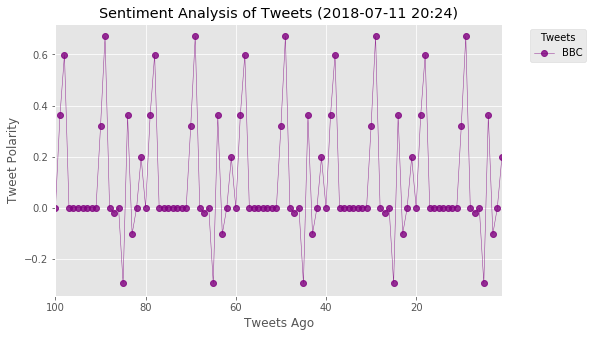

In [18]:
# Create plot for BBC
plt.figure(1,figsize=(8,5))
x_vals = BBC_sentiments_pd["Tweets Ago"]
y_vals = BBC_sentiments_pd["Compound"]
plt.plot(x_vals,y_vals, marker="o", linewidth=0.5,alpha=0.8, label="BBC",color="purple")

# # Incorporate the other graph properties
now = datetime.now()
now = now.strftime("%Y-%m-%d %H:%M")
plt.title(f"Sentiment Analysis of Tweets ({now})")
plt.xlim([x_vals.max(),x_vals.min()])
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
legend = plt.legend(loc='upper right', title='Tweets',bbox_to_anchor=(1.2, 1))

plt.savefig("C:/Users/LENOVO USER/Desktop/USC Data Bootcamp/7-HW, Social-Analytics/BBC_sentiment_analysis.png")
plt.show()


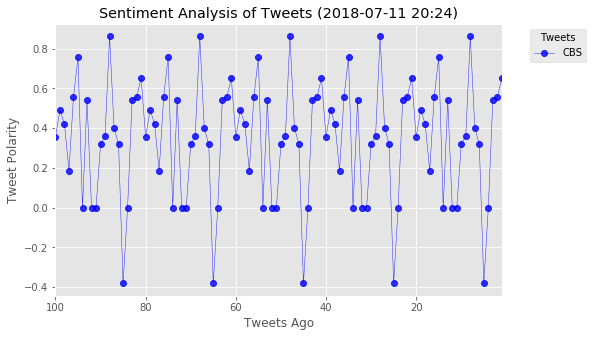

In [19]:
# Create plot for CBS
plt.figure(2,figsize=(8,5))
x_vals = CBS_sentiments_pd["Tweets Ago"]
y_vals = CBS_sentiments_pd["Compound"]
plt.plot(x_vals,y_vals, marker="o", linewidth=0.5,alpha=0.8, label="CBS",color="blue")

# # Incorporate the other graph properties
now = datetime.now()
now = now.strftime("%Y-%m-%d %H:%M")
plt.title(f"Sentiment Analysis of Tweets ({now})")
plt.xlim([x_vals.max(),x_vals.min()])
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
legend = plt.legend(loc='upper right', title='Tweets',bbox_to_anchor=(1.2, 1))

plt.savefig("C:/Users/LENOVO USER/Desktop/USC Data Bootcamp/7-HW, Social-Analytics/CBS_sentiment_analysis.png")
plt.show()

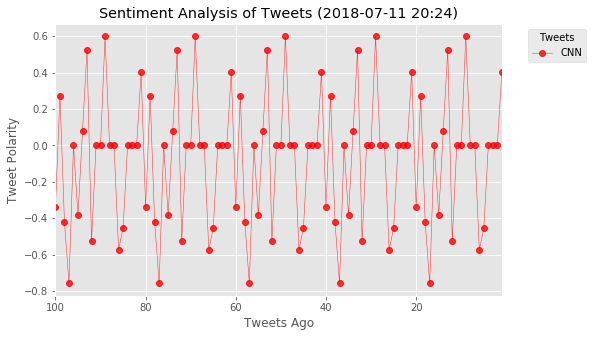

In [20]:
# Create plot for CNN
plt.figure(3,figsize=(8,5))
x_vals = CNN_sentiments_pd["Tweets Ago"]
y_vals = CNN_sentiments_pd["Compound"]
plt.plot(x_vals,y_vals, marker="o", linewidth=0.5,alpha=0.8, label="CNN",color="red")

# # Incorporate the other graph properties
now = datetime.now()
now = now.strftime("%Y-%m-%d %H:%M")
plt.title(f"Sentiment Analysis of Tweets ({now})")
plt.xlim([x_vals.max(),x_vals.min()])
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
legend = plt.legend(loc='upper right', title='Tweets',bbox_to_anchor=(1.2, 1))

plt.savefig("C:/Users/LENOVO USER/Desktop/USC Data Bootcamp/7-HW, Social-Analytics/CNN_sentiment_analysis.png")
plt.show()

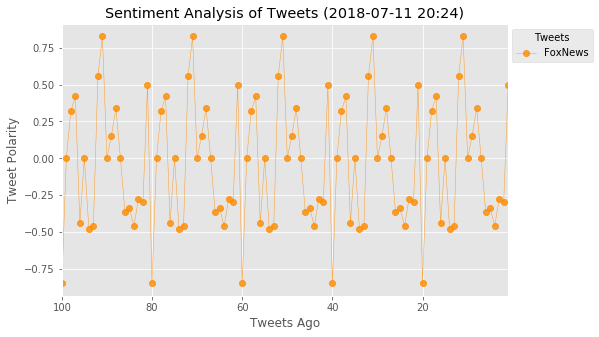

In [21]:
# Create plot for FoxNews
plt.figure(4,figsize=(8,5))
x_vals = Fox_sentiments_pd["Tweets Ago"]
y_vals = Fox_sentiments_pd["Compound"]
plt.plot(x_vals,y_vals, marker="o", linewidth=0.5,alpha=0.8, label="FoxNews",color="darkorange")

# # Incorporate the other graph properties
now = datetime.now()
now = now.strftime("%Y-%m-%d %H:%M")
plt.title(f"Sentiment Analysis of Tweets ({now})")
plt.xlim([x_vals.max(),x_vals.min()])
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
legend = plt.legend(loc='upper right', title='Tweets',bbox_to_anchor=(1.2, 1))

plt.savefig("C:/Users/LENOVO USER/Desktop/USC Data Bootcamp/7-HW, Social-Analytics/Fox_sentiment_analysis.png")
plt.show()

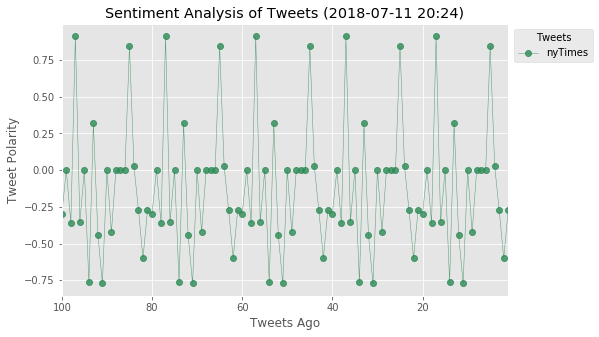

In [22]:
# Create plot for FoxNews
plt.figure(5,figsize=(8,5))
x_vals = NYT_sentiments_pd["Tweets Ago"]
y_vals = NYT_sentiments_pd["Compound"]
plt.plot(x_vals,y_vals, marker="o", linewidth=0.5,alpha=0.8, label="nyTimes",color="seagreen")

# # Incorporate the other graph properties
now = datetime.now()
now = now.strftime("%Y-%m-%d %H:%M")
plt.title(f"Sentiment Analysis of Tweets ({now})")
plt.xlim([x_vals.max(),x_vals.min()])
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
legend = plt.legend(loc='upper right', title='Tweets',bbox_to_anchor=(1.2, 1))

plt.savefig("C:/Users/LENOVO USER/Desktop/USC Data Bootcamp/7-HW, Social-Analytics/nyTimes_sentiment_analysis.png")
plt.show()

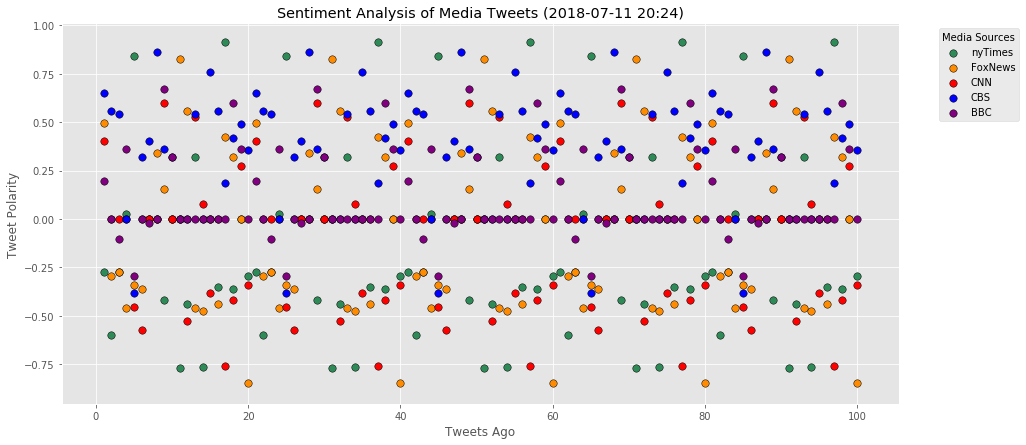

In [23]:
#scatter plot for each media org
plt.figure(6,figsize=(15,7))

#nyTimes
plt.scatter(NYT_sentiments_pd["Tweets Ago"], 
            NYT_sentiments_pd["Compound"], marker="o", color="seagreen",label="nyTimes",s=55,edgecolors="black")

#Fox
plt.scatter(Fox_sentiments_pd["Tweets Ago"], 
            Fox_sentiments_pd["Compound"], marker="o", color="darkorange",label="FoxNews",s=55,edgecolors="black")

#CNN
plt.scatter(CNN_sentiments_pd["Tweets Ago"], 
            CNN_sentiments_pd["Compound"], marker="o", color="red",label="CNN",s=55,edgecolors="black")

#CBS
plt.scatter(CBS_sentiments_pd["Tweets Ago"], 
            CBS_sentiments_pd["Compound"], marker="o", color="blue",label="CBS",s=55,edgecolors="black")

#BBC
plt.scatter(BBC_sentiments_pd["Tweets Ago"], 
            BBC_sentiments_pd["Compound"], marker="o", color="purple",label="BBC",s=55,edgecolors="black")

plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.title(f"Sentiment Analysis of Media Tweets ({now})")
legend = plt.legend(loc='upper right', title='Media Sources',bbox_to_anchor=(1.15, 1))

plt.savefig("C:/Users/LENOVO USER/Desktop/USC Data Bootcamp/7-HW, Social-Analytics/media_sentiment_analysis_scatter.png")
plt.show()

In [24]:
#calculate overall compound sentiment per news org

overall_sentiment = sentiments_pd.groupby("News_Org")["Compound"].mean()

overall_sentiment_pd = pd.DataFrame({'Overall_Sentiment':overall_sentiment})
overall_sentiment_pd = overall_sentiment_pd.reset_index()

overall_sentiment_pd

,News_Org,Overall_Sentiment
0,BBC,0.104470
1,CBS,0.346960
2,CNN,-0.078815
3,Fox News,-0.042125
4,The New York Times,-0.122535


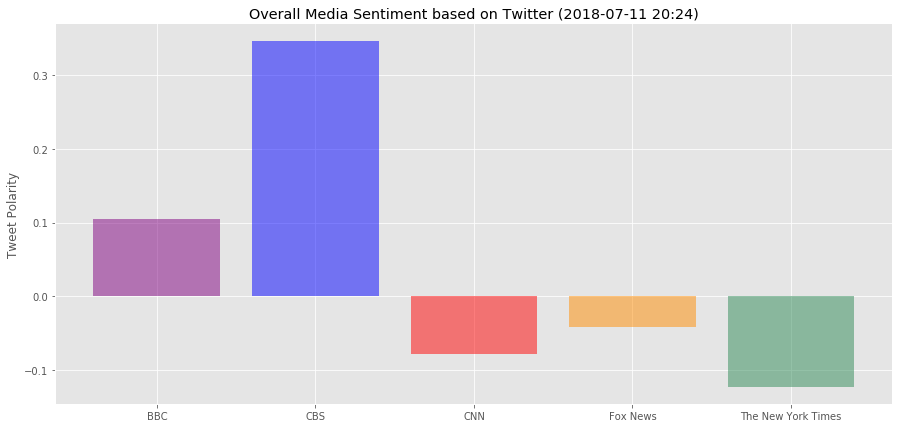

In [25]:
#bar plot
plt.figure(7,figsize=(15,7))

color_list = {"BBC":"purple","CBS":"blue","CNN":"red","Fox News":"darkorange","The New York Times":"seagreen"}

plt.bar(overall_sentiment_pd["News_Org"], overall_sentiment_pd["Overall_Sentiment"], alpha=0.5, align="center",
       color=[color_list[m] for m in overall_sentiment_pd['News_Org']])


plt.title(f"Overall Media Sentiment based on Twitter ({now})")
#plt.xlabel("Media/News Organization")
plt.ylabel("Tweet Polarity")

plt.savefig("C:/Users/LENOVO USER/Desktop/USC Data Bootcamp/7-HW, Social-Analytics/media_sentiment_analysis_bar.png")
plt.show()

# Twitter Media Analysis:

1 - Based on the latest 100 tweets per media, FoxNews tweets are the most neutral compared to other news organizations such as BBC, CNN, CBS and The NY Times with average sentiment score of -0.042125, which represents the least political attitudes or polarization. In contrast, CBS's tweets have the most positive polarity with 0.346960 sentiment scores.

2 - Based on the scatter plot, the polarity of the tweets sent by each media organization are up and down except CBS's tweets that are positive most of the times.  

3 - Based on each sentiment analysis, the tweets that get sent by each organization have similar behavior. Media organization are sending either positive or negative tweets to attrack attention from the audience, but between few positive/negative tweets there's always some tweets are neutral and acts as "break-point" that pause the positive/negative tweets for short period time.

(note: tweets sentiments change from time to time depending on media's preference. In this exercise, the data and sentiment result change everytime the codes got ran) 